# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div> <b>Цель исследования:</b><br>
    1. Изучить влияние параметров жилья на его стоимость.<br>
    2. Изучить влияние географии на стоимость жилья.<br>
    3. Оценить влияние дня недели и месяца на количество объявлений<br><br>
    <b>Ход исследования:</b><br>
    1. После выгрузки таблицы посмотрим на данные, постараемся избавиться от пропусков и дубликатов.<br>
    2. Посчитаем дополнительные характеристики жилья.<br>
    <ul>
         <li>цена одного квадратного метра;</li>
         <li>день недели, месяц и год публикации объявления </li>
         <li>тип этажа квартиры</li>
         <li>расстояние до центра города в километрах</li>
    </ul>
    3. Изучим распределения значений по колонкам.<br>
    4. Исследуем влияние параметров жилья на цену и количество объявлений. 
    </div>

### Откройте файл с данными и изучите общую информацию. 
#### Информация о таблице

In [1]:
import pandas as pd

data = pd.read_csv('real_estate_data.csv', sep='\t')
display(data.head())
display(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Заметно большое количество пустых полей.
#### Гистограммы всех колонок таблицы

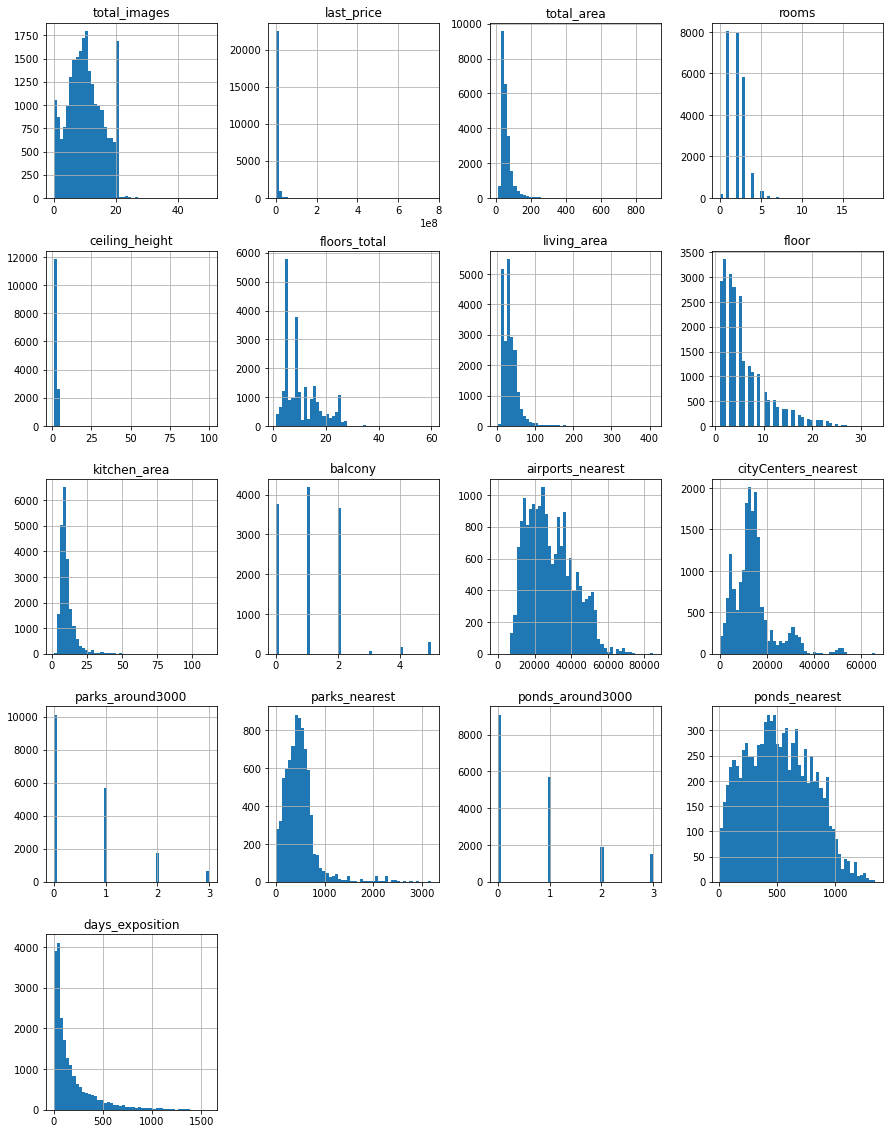

In [2]:
data.hist(figsize=(15, 20), bins= 50);

На графике цены (last_price) хорошо видно наличие выбросов. Значения выше 100 млн. не видны на гистограмме.

### Предобработка данных
#### Пропущенные значения
Посмотрю какие есть пропуски и можно ли их заполнить. Постараюсь на этом этапе не удалять строчки, в последсвии перед анализом данных буду выбирать только заполненые строки.
##### Этажность строения
Возможно этажность не указана для котеджей.

In [3]:
display(data[data['floors_total'].isna()].head())
data['floors_total'] = data['floors_total'].fillna(0)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Гипотеза не подтвердилась, это помещения на разных этажах. Впишу в пустые строчки 0.

##### Жилая площадь и площадь кухни
Возможно помещения без жилой площади не являются жилыми квартирами.

In [4]:
display(data[data['living_area'].isna()].head())
len(data[(data['living_area'].isna()) & (data['kitchen_area'].isna())])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


1464

Похоже что это все-таки жилые объекты. Часто значения жилой площади и площади кухни не указаны одновременно.

##### Апартаменты
Люди не знакомые с таким термином не заполняют это поле, скорее всего это жилье имеет статус жилья. Заполню все пропуски значением False.

In [5]:
print(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(False)

[nan False True]


##### Балкон
Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

##### Локация
Если расстояние до центра меньше 15км будем считать, что это Санкт-Петербург.

In [7]:
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] < 15000),
         'locality_name'] = 'Санкт-Петербург'

##### Расстояния до центра, аэропорта, парка и водоема
Если расстояния не указаны, то ,скорее всего, они очень велеки. Эти значения хорошо бы выделить в отдельную группу вместе с большими значениями. Создам отдельные столбцы в  [следующем разделе](#Посчитайте-и-добавьте-в-таблицу-новые-столбцы).

##### Парки и водоемы поблизости
Если значения пропущены, то ,скорее всего, парков и водоемов поблизости нет. Заменю пропуски на 0. 

In [8]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 
                                                       'ponds_around3000']].fillna(0)

##### Время размещения
Скорее всего, эти объявления были размещены и сразу сняты, считаю информацию в них неактуальной.

In [9]:
data = data.dropna(subset=['days_exposition'])

#### Преобразование типов
Заменю дату публикации на datetime.

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S').dt.round('d')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        12051 non-null  float64       
 6   floors_total          20518 non-null  float64       
 7   living_area           18813 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          18443 non-null  float64       
 13  balcony         

None

#### Дубликаты
Избавлюсь от дубликатов в названиях населенных пунктов

In [11]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')
print(data['locality_name'].unique())

['посёлок Шушары' 'Санкт-Петербург' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Кингисепп' 'Сестрорецк' 'деревня Куттузи'
 'поселок городского типа Ефимовский' 'посёлок Плодовое'
 'деревня Заклинье' 'поселок Торковичи' 'Красное Село' 'посёлок Понтонный'
 'Сясьстрой' 'посёлок Новый Свет' 'Приозерск' 'Сланцы' 'село Путилово'
 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'
 'поселок Романовка' 'посёлок Бугры' 'поселок Бугры'
 'поселок городского типа Рощино' 'Луга' 'Волосово' 'Отрадное'
 'село Павл

In [12]:
words = ['поселок ', 'посёлок ', 
         'городской ', 'городского типа ', 
         'станции ','деревня ', 
        'коттеджный ', 'садовое товарищество ']
def clean_word(row):
    if word in row:
        return row.replace(word, '')
    elif word not in row:
        return row
for word in words:
    data['locality_name'] = data['locality_name'].apply(clean_word)
print(data['locality_name'].unique())

['Шушары' 'Санкт-Петербург' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Сиверский' 'Молодцово' 'Кузьмоловский'
 'Павловск' 'Пикколово' 'Всеволожск' 'Кингисепп' 'Сестрорецк' 'Куттузи'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Красное Село' 'Понтонный'
 'Сясьстрой' 'Новый Свет' 'Приозерск' 'Сланцы' 'село Путилово' 'Ивангород'
 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор' 'Оржицы'
 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Луга' 'Волосово' 'Отрадное'
 'село Павлово' 'Оредеж' 'село Копорье' 'Тихвин' 'Нурма' 'Синявино'
 'Тосно' 'Стрельна' 'Александровская' 'Лопухинка' 'Пикалёво' 'Терволово'
 'Советский' 'Аннино' 'Кириши' 'Бокситогорск' 'Токсово' 'Сельцо' 'Вырица'
 'Келози' 'Вартемяги' 'Тельмана' 'Севастьяново' 'Большая Ижора' 'Павлово'
 'Агалатово' 'Новогорелово' 'Старая' 'Волхов' 'Новоселье'
 'Большие Колпа

#### Выбивающиеся значения
Посмотрим на выбросы
##### Цена

In [13]:
display(data.sort_values(['last_price'], ascending=False).head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,False,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.5,7.0,95.0,5,False,...,40.0,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.0,5,False,...,70.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


Большие квартиры по большой цене похоже на правду.
Очевидно выбросы по площади тоже не опечатка.

Хочется разделить таблицу по стоимости.

19999
487
32


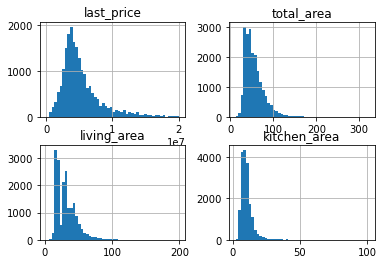

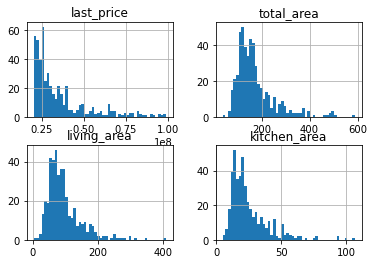

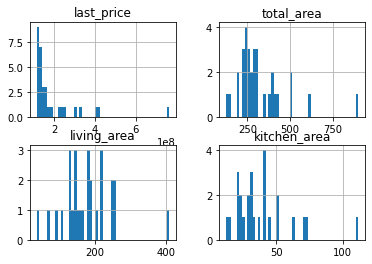

In [14]:
data_chip = data[data['last_price']<20000000]
data_exp = data[(data['last_price']>=20000000) & (data['last_price']<100000000)]
data_elit = data[data['last_price']>=100000000]

for h in [data_chip, data_exp, data_elit]:
    h.hist(['last_price', 'total_area', 'living_area', 'kitchen_area'], bins=50)
    print(len(h))


Графики для площади выглядят адекватно: при площади 300 $ м^2 $ иметь столовую и жилое помещение 100 $ м^2 $ и 200 $ м^2 $ соответственно

<AxesSubplot:>

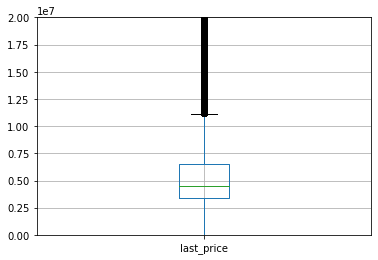

In [15]:
import matplotlib.pyplot as plt
plt.ylim(0, 20000000)
data.boxplot('last_price')

##### Высота потолка
Заполню пустые ячейки 0. Высота потолков 25 м и 32 м, скорее всего, на самом деле вещественные значения: 2.5 м и 3.2 м, предпоагаю такое смещение для всех значений больше 10.3 м, затем разделю все значения на группы. Минимальные потолки в России 2.4м, ниже 2 значения нереалестичны.

In [16]:
data['ceiling_height_new'] = data['ceiling_height'].fillna(0)

data['ceiling_height_new'] = (
    data['ceiling_height_new'].where(data['ceiling_height_new'] < 11, 
                                     (data['ceiling_height_new']/10))
)
def sort_height(height):
    if 2 <= height <= 2.75:
        return 'обычные'
    elif 2.75 < height <= 3.5:
        return 'высокие'
    elif 3.5 < height < 6:
        return 'элитные'
    elif 6 < height:
        return 'двухуровневые'
    else:
        return 'неопределено'
data['ceiling_height_sort'] = data['ceiling_height_new'].apply(sort_height)
print(data.pivot_table(index='ceiling_height_sort', 
                       values='last_price', aggfunc='count'))

                     last_price
ceiling_height_sort            
высокие                    3136
двухуровневые                 6
неопределено               8472
обычные                    8691
элитные                     213


##### Этажность

In [17]:
print(sorted(data['floors_total'].unique()))
print(sorted(data['floor'].unique()))
display(data.info())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 33.0, 34.0, 35.0, 36.0, 37.0, 52.0, 60.0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        12051 non-null  float64       
 6   floors_total          20518 non-null  float64       
 7   living_area           18813 non-nul

None

В Санкт-Петербурге нет жилых домов выше 37 этажей. Значения выше заменю на 0.

In [18]:
data.loc[data['floors_total']>37,'floors_total'] = 0
data['floors_total'] = data['floors_total'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        12051 non-null  float64       
 6   floors_total          20518 non-null  int32         
 7   living_area           18813 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          18443 non-null  float64       
 13  balcony         

<div> <b>Проверим на явные дубликаты</div>

In [19]:
data.duplicated().unique()

array([False])

Их нет

### Посчитайте и добавьте в таблицу новые столбцы
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [20]:
data_full = data.copy()
def floor_type(floor):
    if floor == 1:
        return 'первый'
    elif floor == data_part['floors_total']:
        return 'последний'
    else:
        return 'другой'

data_full['meter_price'] = data_full['last_price'] / data_full['total_area']

data_full['dayofweek_exposition'] = (
    data_full['first_day_exposition'].dt.dayofweek
)

data_full['month_exposition'] = data_full['first_day_exposition'].dt.month

data_full['year_exposition'] = data_full['first_day_exposition'].dt.year

data_full.loc[data_full['floor']== 1,'floor_type'] = 'первый'
data_full.loc[data_full['floor']== data_full['floors_total'],'floor_type'] = 'последний'
data_full['floor_type'] = data_full['floor_type'].fillna('другой')

data_full['cityCenters_nearest_km'] = (data_full['cityCenters_nearest']/1000).round()
display(data_full[['meter_price', 'dayofweek_exposition', 'month_exposition', 
            'year_exposition', 'floor_type', 'cityCenters_nearest_km']].head(10))
display(data_full)

,meter_price,dayofweek_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1,82920.792079,1,12,2018,первый,19.0
2,92785.714286,3,8,2015,другой,14.0
3,408176.100629,4,7,2015,другой,7.0
4,100000.000000,1,6,2018,другой,8.0
5,95065.789474,0,9,2018,другой,NaN
6,99195.710456,3,11,2017,другой,19.0
8,87454.764777,2,5,2018,другой,NaN
9,88524.590164,6,2,2017,другой,15.0
10,127525.252525,3,11,2017,другой,14.0
11,75000.000000,0,8,2018,другой,52.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_height_new,ceiling_height_sort,meter_price,dayofweek_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81.0,0.00,неопределено,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558.0,0.00,неопределено,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424.0,0.00,неопределено,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,3.03,высокие,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,55.0,0.00,неопределено,95065.789474,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519.0,2.75,обычные,129903.978052,3,10,2016,другой,4.0
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,False,...,NaN,413.0,0.00,неопределено,45000.000000,4,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,675.0,239.0,2.60,обычные,73717.948718,4,8,2016,другой,34.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,False,...,NaN,45.0,0.00,неопределено,52542.372881,0,1,2018,другой,NaN


### Проведите исследовательский анализ данных
Посмотрим на гистограммы, среднее значение и медиану некоторых параметров.

In [21]:
def stats(parameter, cut=1000000000, data=data_full):
    data_parameter = data[data[parameter]<cut]
    display(pd.DataFrame({
        'количество меньше "cut"': [len(data_parameter)],
        'медиана' : [data_parameter[parameter].median()],
        'среднее' : [data_parameter[parameter].mean()]
    }))
   
    data_parameter.plot(
    kind='hist',
    y=parameter,
    alpha=0.5,
    bins=100
    );

#### Общая площадь

,"количество меньше ""cut""",медиана,среднее
0,20084,50.0,55.475514


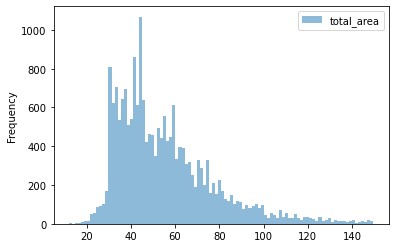

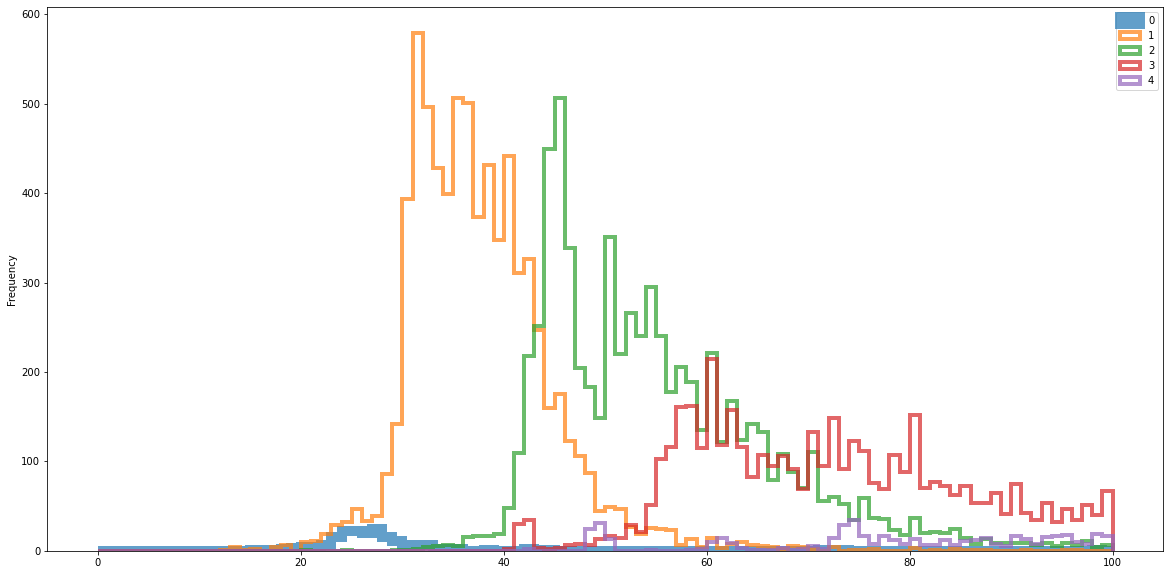

In [22]:
stats('total_area', 150)
ax = data_full[data_full['rooms']==0].plot(
    kind='hist',
    y='total_area',
    histtype='step',
    alpha=0.7,
    bins=100,
    label=0,
    linewidth=10,
    range=(0, 100),
    figsize=(20,10)
)
for r in range(1,5):
    data_rooms = data_full[data_full['rooms']==r]
    data_rooms.plot(
        kind='hist',
        y='total_area',
        histtype='step',
        alpha=0.7,
        ax=ax,
        label=r,
        linewidth=4,
        range=(0, 100),
        bins=100
)

#### Жилая площадь 

,"количество меньше ""cut""",медиана,среднее
0,18718,29.96,32.707586


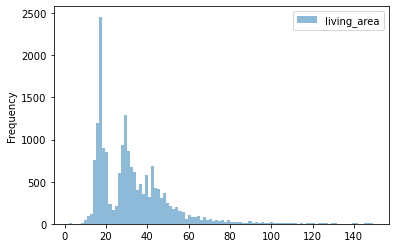

In [23]:
stats('living_area', 150)  


Вот это уже интересно. Хороши видны два пика. возможно это связано с количеством комнат. 

,rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
median,living_area,18.000000,17.60000,30.400000,44.800000,63.000000,92.000000,133.400000,151.400000,162.000000,199.0,175.4,129.0,409.7,195.15,409.0,180.0,264.5
mean,living_area,18.805497,17.85306,31.589032,47.166857,66.039278,102.173543,136.288451,169.222857,174.290909,195.0,175.4,129.0,409.7,195.15,409.0,180.0,264.5


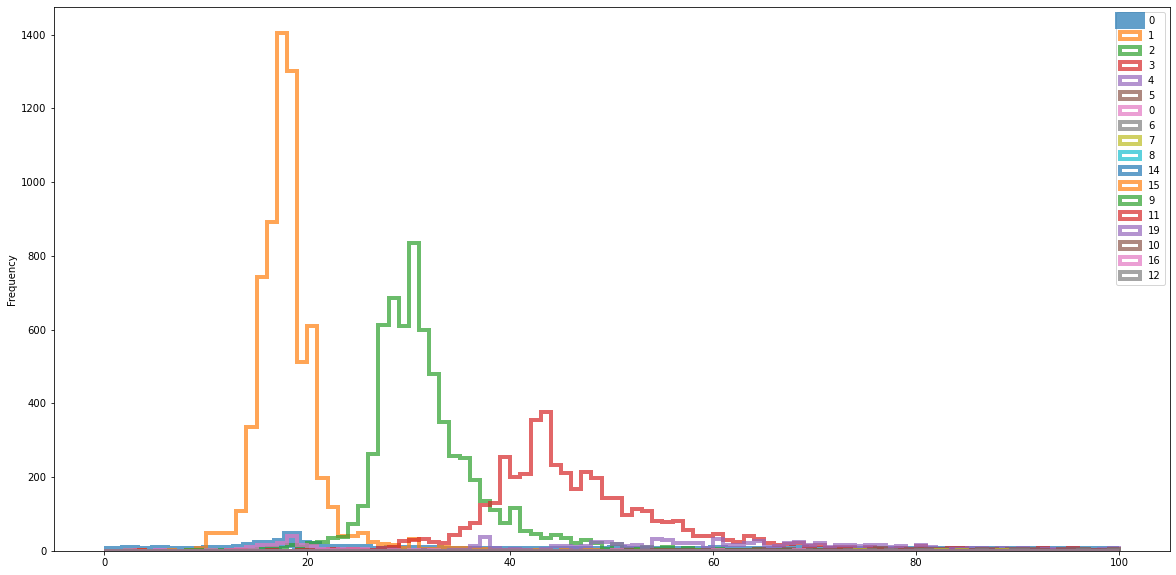

In [24]:
display(data_full.pivot_table(index='rooms', values='living_area', aggfunc=['median', 'mean']).T)
ax = data_full[data_full['rooms']==0].plot(
    kind='hist',
    y='living_area',
    histtype='step',
    alpha=0.7,
    bins=100,
    label=0,
    linewidth=10,
    range=(0, 100),
    figsize=(20,10)
)
for r in data_full['rooms'].unique():
    data_rooms = data_full[data_full['rooms']==r]
    data_rooms.plot(
        kind='hist',
        y='living_area',
        histtype='step',
        alpha=0.7,
        ax=ax,
        label=r,
        linewidth=4,
        range=(0, 100),
        bins=100
)

Похоже пики создают появляются от разного количества комнат. Основной вклад вносят квартиры до 3-х комнат.

#### Площадь кухни

,"количество меньше ""cut""",медиана,среднее
0,18328,9.0,10.181119


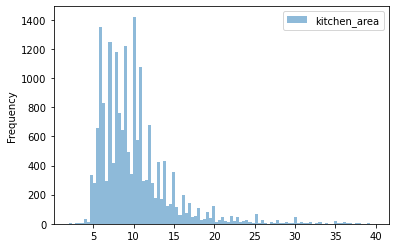

In [25]:
stats('kitchen_area', 40)

Заметны пики, возможно это значения площади округленной до целых значений.

<AxesSubplot:ylabel='Frequency'>

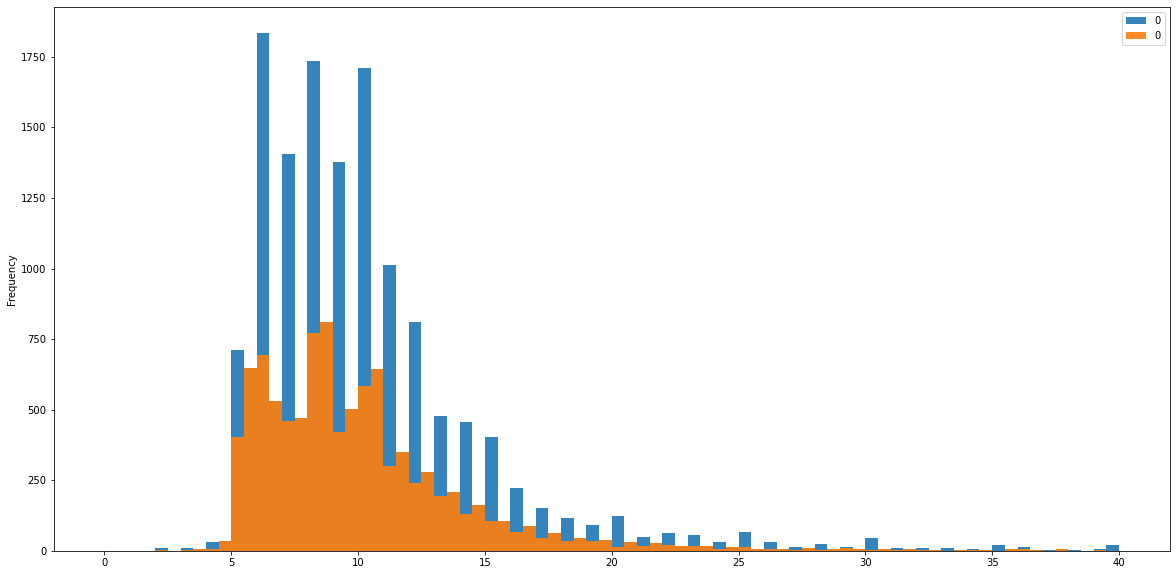

In [26]:
ax = data_full.plot(
    kind='hist',
    y='kitchen_area',
    alpha=0.9,
    bins=80,
    label=0,
    linewidth=1,
    range=(0, 40),
    figsize=(20,10)
)
data_full[data_full['kitchen_area']*10%10!=0].plot(
    kind='hist',
    y='kitchen_area',
    alpha=0.9,
    bins=80,
    label=0,
    linewidth=1,
    range=(0, 40),
    ax=ax,
    figsize=(20,10)
)

Пики соответствуют целым значениям.

#### Цена объекта
Рассмотрим отдельно информацию про разные ценовые категории.

,"количество меньше ""cut""",медиана,среднее
0,19999,4499000.0,5.265869e+06


,"количество меньше ""cut""",медиана,среднее
0,487,28050000.0,3.493111e+07


,"количество меньше ""cut""",медиана,среднее
0,32,144000000.0,1.951798e+08


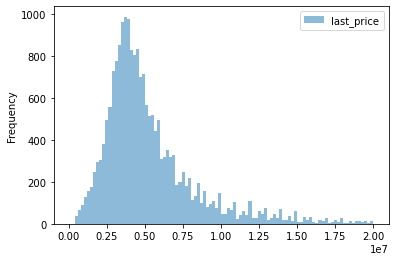

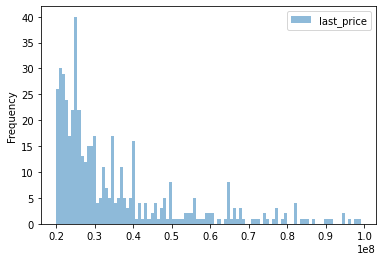

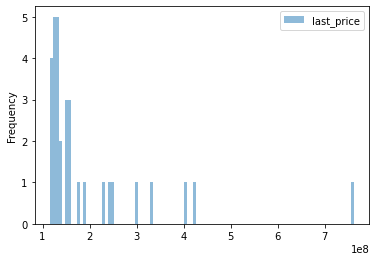

In [27]:
stats('last_price',1000000000, data_chip)
stats('last_price',1000000000, data_exp)
stats('last_price',10000000000, data_elit)

График с основным количеством квартир выглядит правдоподобно. Объективнее делать разделение по стоймости квадратного метра.

array([[<AxesSubplot:title={'center':'meter_price'}>]], dtype=object)

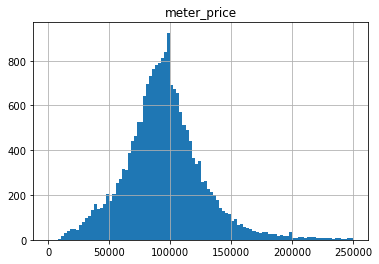

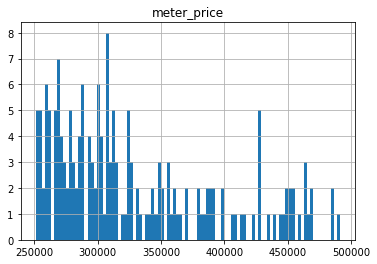

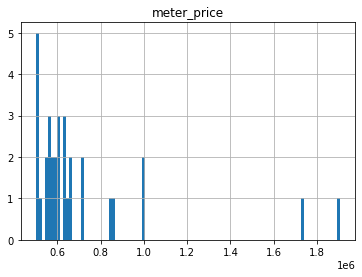

In [28]:
data_full[data_full['meter_price']<=250000].hist('meter_price',bins=100)
data_full[(data_full['meter_price']>250000)&(data_full['meter_price']<500000)] .hist('meter_price',bins=100)
data_full[data_full['meter_price']>=500000].hist('meter_price',bins=100)

Опять же график для основного числа квартир правдоподобен, а жилья дороже уже крайне мало.

#### Количество комнат

,"количество меньше ""cut""",медиана,среднее
0,20457,2.0,2.005964


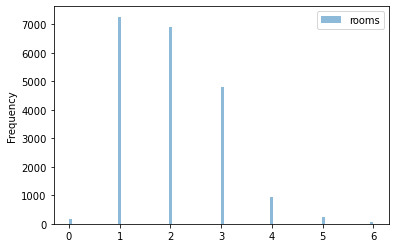

In [29]:
stats('rooms', 7)

Как уже отмечалось больше всего квартир с 1, 2 или 3 комнатами. Более 5 комнат предложений исчезающе мало.

#### Высота потолков
Посмотрим на гистограмму не только численных значений, но и распределение по группам.

<AxesSubplot:xlabel='ceiling_height_sort'>

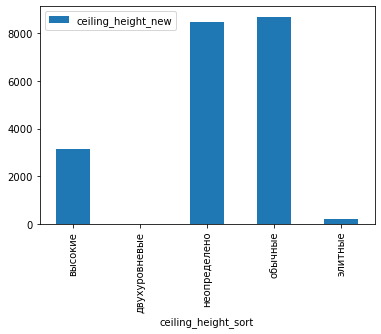

In [30]:
data_full.pivot_table(index='ceiling_height_sort', 
                      values='ceiling_height_new', 
                     aggfunc='count').plot(kind='bar')

Количество квартир с потолками выше 2,75 резко уменьшается, а больше 3.5 м объявлений почти нет.

#### Этаж квартиры, тип этажа квартиры, общее количество этажей в доме

,"количество меньше ""cut""",медиана,среднее
0,20518,4.0,5.987133


,"количество меньше ""cut""",медиана,среднее
0,20518,9.0,10.814553


<AxesSubplot:ylabel='Frequency'>

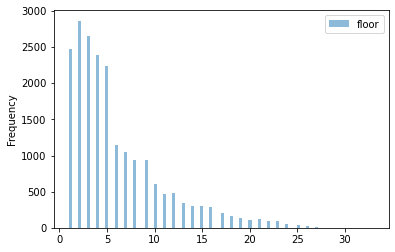

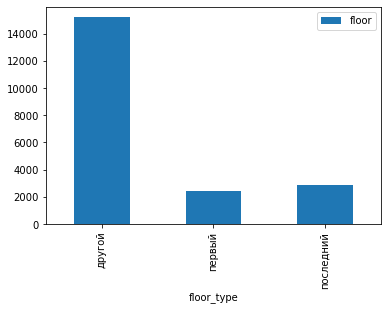

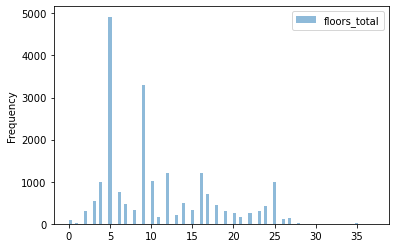

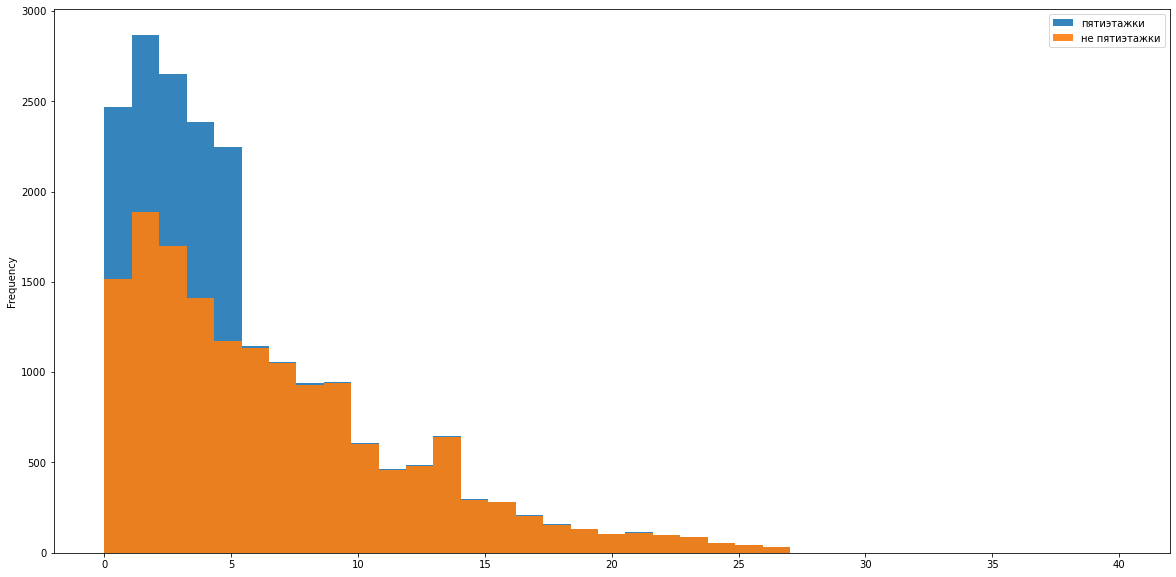

In [31]:
stats('floor')

data_full.pivot_table(index='floor_type', 
                      values='floor', 
                     aggfunc='count').plot(kind='bar')

stats('floors_total')

ax = data_full.plot(
    kind='hist',
    y='floor',
    alpha=0.9,
    bins=37,
    label='пятиэтажки',
    linewidth=1,
    range=(0, 40),
    figsize=(20,10)
)
#не забудем про нули
data_full[~(data_full['floors_total'].isin([0,5]))].plot(
    kind='hist',
    y='floor',
    alpha=0.9,
    bins=37,
    label='не пятиэтажки',
    linewidth=1,
    range=(0, 40),
    ax=ax,
    figsize=(20,10)
)


Много объявлений с квартирами на первых 5 этажах, т.к. много 5-и этажных домов.

#### Расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка

,"количество меньше ""cut""",медиана,среднее
0,15865,13166.0,14292.967097


,"количество меньше ""cut""",медиана,среднее
0,15843,26768.0,28840.336047


,"количество меньше ""cut""",медиана,среднее
0,6934,451.0,491.088405


21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64


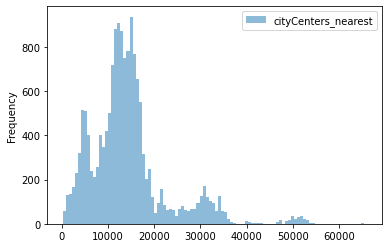

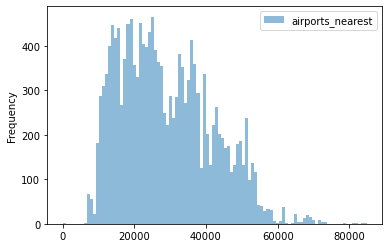

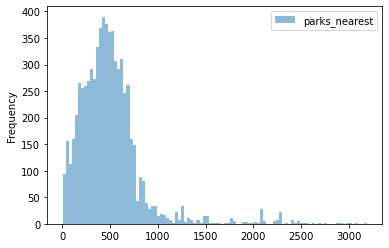

In [32]:
stats('cityCenters_nearest')
stats('airports_nearest')
stats('parks_nearest')
print(data['airports_nearest'].sort_values().head())

Можно заметить несколько пиков. Первый можно связать с историческим районом, второй самый большой - со спальными районами на окраине города. Маленькие пики в районе 30 и 50 км, скорее всего, крупные населенные пункты в области. Ближе 6.5 км от аэропорта объявлений нет. Про парк в основном пишут если он находится не дальше 1км.

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

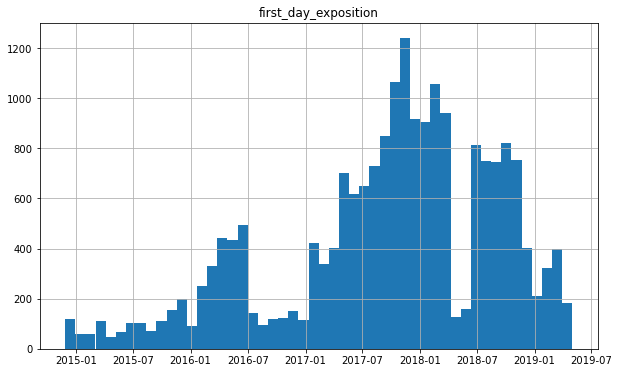

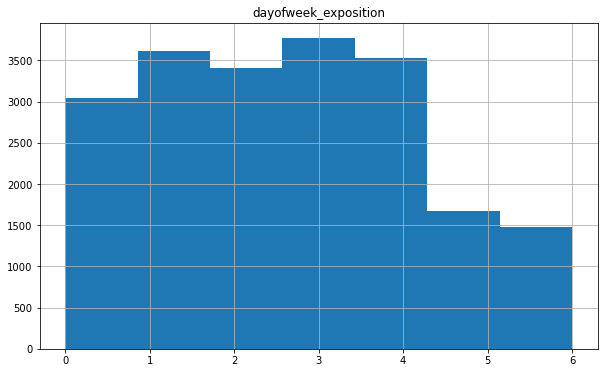

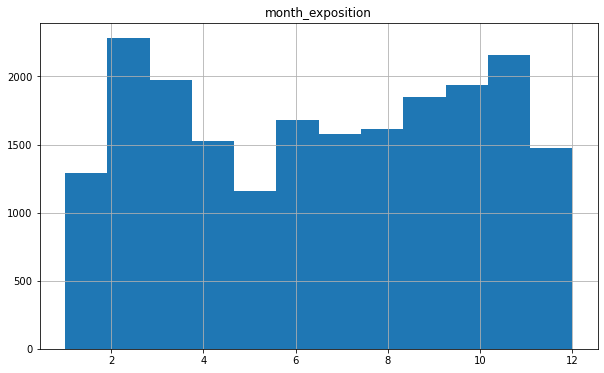

In [33]:
data.hist('first_day_exposition', bins=50, figsize=(10,6));
data_full.hist('dayofweek_exposition', bins=7, figsize=(10,6))
data_full.hist('month_exposition', bins=12, figsize=(10,6))

Количество объявлений росло с 1015-го по конец 2017-го годов, потом начало снижаться. Есть большие провалы во второй половине 2016-го года и второй четверти 2018-го.

Интересно в выходные появляется меньше объявлений, по-видимому основное количество объявлений от риэлторских агенств. Видны провалы в мае и в районе нового года, что может быть связано с большим количеством праздничных дней.

#### Время продажи квартиры

,"количество меньше ""cut""",медиана,среднее
0,1130,6.0,5.952212


,"количество меньше ""cut""",медиана,среднее
0,19659,90.0,147.909405


,"количество меньше ""cut""",медиана,среднее
0,10507,45.0,44.707338


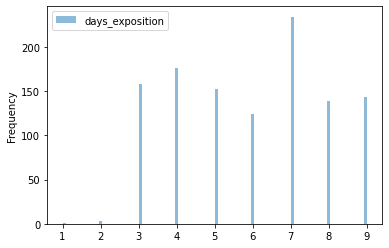

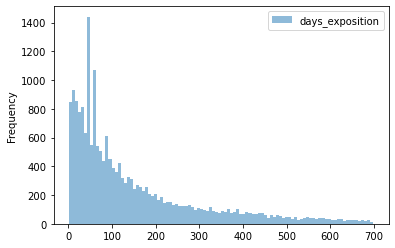

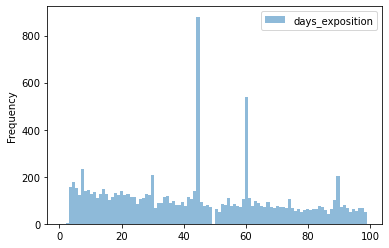

In [34]:
stats('days_exposition', 10)
stats('days_exposition', 700)
stats('days_exposition', 100)

Считаю продажи за 1-2 дня быстрыми, а долгими - более 2 лет. Видны гигантские пики на 45, 60 и 90 днях, возможно это связано с временем подготовки каких-то документов.

#### Влияние параметров на общую стоимость
* общей площади
* жилой площади
* площади кухни
* количества комнат
* этажа, на котором расположена квартира (первый, последний, другой)
* даты размещения (день недели, месяц, год)

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.835729,0.746706,0.600523,0.534553
total_area,0.835729,1.000000,0.938620,0.585950,0.771965
living_area,0.746706,0.938620,1.000000,0.402323,0.854568
kitchen_area,0.600523,0.585950,0.402323,1.000000,0.244566
rooms,0.534553,0.771965,0.854568,0.244566,1.000000


               median          mean
           last_price    last_price
floor_type                         
другой      4700000.0  6.420232e+06
первый      3817262.0  4.509181e+06
последний   4250000.0  6.956201e+06


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

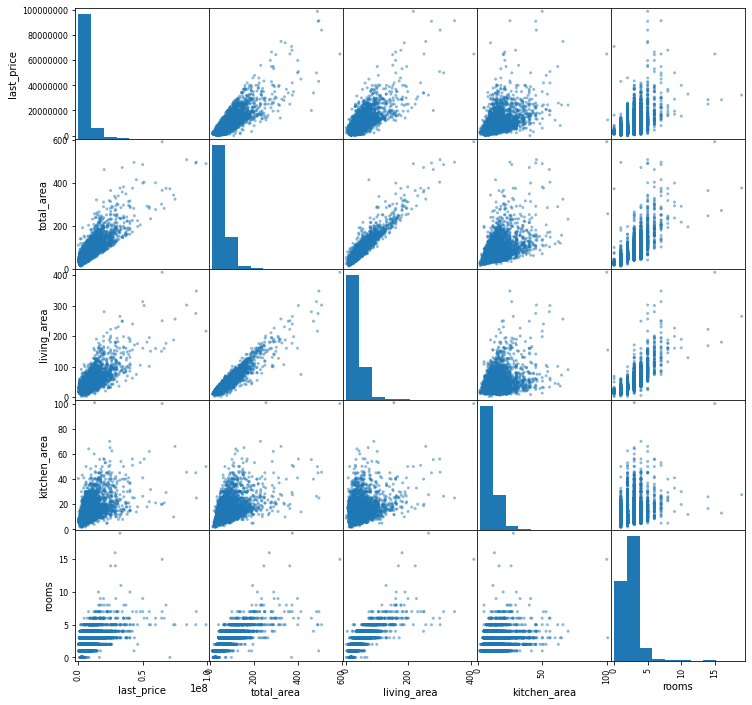

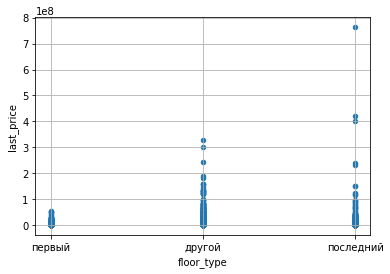

In [35]:
cor_data = data_full[data_full['meter_price']<=250000]
cor_table = cor_data[['last_price',
                 'total_area', 
                 'living_area', 
                 'kitchen_area',
                 'rooms',
                 'first_day_exposition']]
display(cor_table.corr())
pd.plotting.scatter_matrix(cor_table, figsize=(12,12));
print(data_full.pivot_table(index='floor_type', 
                            values='last_price', 
                            aggfunc=['median', 'mean'] ))
data_full.plot.scatter(x='floor_type', y='last_price', grid=True )
#data_full.boxplot('last_price', by='floor_type',loglog=True, grid=True)

Все эти параметры влияют на окончательную стоимость. Больше всего общая площадь и близко с ней связанная жилая площадь. Площадь кухни и количество комнат влияют значительно меньше. Расположенрие квартиры тоже влияет на цену, но не линейно: на первом этаже квартиры дешевле на 23%, на последнем - более чем на 10%. Тем не мение самые дорогие квартиры находятся именно на последних этажах.

#### Средняя цена квадратного метра

In [36]:
data_price = (data_full
                  .pivot_table(index='locality_name',
                               values='meter_price', 
                               aggfunc=['median', 'mean', 'count'])
                  )
data_price.columns = ['median', 'mean', 'count']
data_price = data_price[data_price['count']>10].sort_values(by='median',ascending=False)
display('Самые дорогие:', data_price.head(10), 'Самые дешевые:', data_price.tail(10))

'Самые дорогие:'

,median,mean,count
locality_name,,,
Санкт-Петербург,103052.015176,112403.495726,13666
Зеленогорск,100000.000000,111332.344382,21
Сестрорецк,98341.232227,101232.408917,163
Пушкин,97938.144330,102074.629153,307
Кудрово,94594.594595,94408.041602,441
Парголово,91387.362637,89505.043917,302
Стрельна,87323.348694,89112.408096,38
Мурино,86075.949367,85743.233293,551
Павловск,85454.545455,83696.923067,31


'Самые дешевые:'

,median,mean,count
locality_name,,,
Кириши,37671.232877,38287.019023,93
Сясьстрой,35483.870968,34834.588060,17
Любань,35391.566265,36451.507309,11
Волхов,34545.454545,34883.232217,85
Ивангород,31480.186480,33309.046924,22
Назия,31308.182264,30710.929741,14
Лодейное Поле,28448.275862,32186.484620,19
Пикалёво,18895.348837,18661.587821,17
Сланцы,18666.666667,18394.956815,91


Убрал из списка населенные пункты, где меньше 10 предложений, т.к. считаю их не показательными. Стоимость $ м^2 $ различается на порядок.

In [37]:
data.groupby('locality_name').agg({'balcony':'count'}).sort_values(by = 'balcony', ascending = False).head(10)
display(data_price.sort_values(by='count',ascending=False).head(10))

,median,mean,count
locality_name,,,
Санкт-Петербург,103052.015176,112403.495726,13666
Мурино,86075.949367,85743.233293,551
Кудрово,94594.594595,94408.041602,441
Шушары,76220.394737,78010.167480,408
Всеволожск,65789.473684,68570.615292,339
Колпино,74005.089610,74865.364347,308
Пушкин,97938.144330,102074.629153,307
Парголово,91387.362637,89505.043917,302
Гатчина,67180.706522,67928.326990,268


#### "Стоимость километра"

,cityCenters_nearest_km,last_price,meter_price
cityCenters_nearest_km,1.000000,-0.736701,-0.739063
last_price,-0.736701,1.000000,0.876780
meter_price,-0.739063,0.876780,1.000000


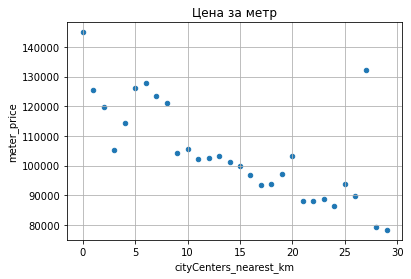

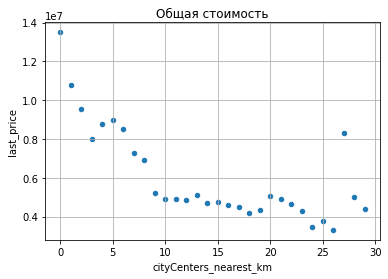

In [38]:
data_price_km = (data_full
                 .query('locality_name == "Санкт-Петербург"')
                 .pivot_table(index='cityCenters_nearest_km',
                              values=['meter_price',
                                      'last_price'],
                              aggfunc='median')
                 .reset_index(level=0)
                )
data_price_km.plot.scatter(x='cityCenters_nearest_km', 
                           y='meter_price', 
                           grid=True ,
                          title = 'Цена за метр')
data_price_km.plot.scatter(x='cityCenters_nearest_km', 
                           y='last_price', 
                           grid=True ,
                          title = 'Общая стоимость')
data_price_km.corr()

Стоимость квадратного метра падает почти линейно в зависимости от расстояния до центра. Цена квартир резко падает от 0 до 10 км после чего почти не меняется.

### Общий вывод

Провел анализ рынка жилья в Санкт-Петербурге, для этого заполнил пропуски в некоторых столбцах, избавился от некорректных значений. Стандартизировал названия населенных пунктов.<br>
Добавил столбцы со значениями:
 <ul>
         <li>цена одного квадратного метра</li>
         <li>день недели, месяц и год публикации объявления </li>
         <li>тип этажа квартиры</li>
         <li>расстояние до центра города в километрах</li>
 </ul>
Провел исследование зависимости цены от таких параметров как:
    <ul>
         <li>общая площадь, жилая площадь и площадь кухни</li>
         <li>количество комнат</li>
         <li>тип этажа квартиры</li>
         <li>расстояние до центра города в километрах</li>
         <li>дата, день недели и месяц размещения объявления</li>
    </ul>
    
Как и предполагалось, чем больше квартира и чем ближе она к центру города, тем она дороже. Жилье на первом и последнем этажах значительно дешевле, за исключением элитных пентхаусов. Количество объявлений зависит от времени года, в декабре, январе и марте появляется значительно меньше объявлений.